<a href="https://colab.research.google.com/github/dondiana/pp/blob/main/loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing Values Summary:
                                Missing Values  Percentage (%)
person_age                                   0             0.0
person_gender                                0             0.0
person_education                             0             0.0
person_income                                0             0.0
person_home_ownership                        0             0.0
loan_amnt                                    0             0.0
loan_intent                                  0             0.0
loan_int_rate                                0             0.0
credit_score                                 0             0.0
previous_loan_defaults_on_file               0             0.0
loan_status                                  0             0.0

Top Insights:
Number of Rows: 45000
Number of Columns: 11
Duplicate Rows: 0

Summary Stati

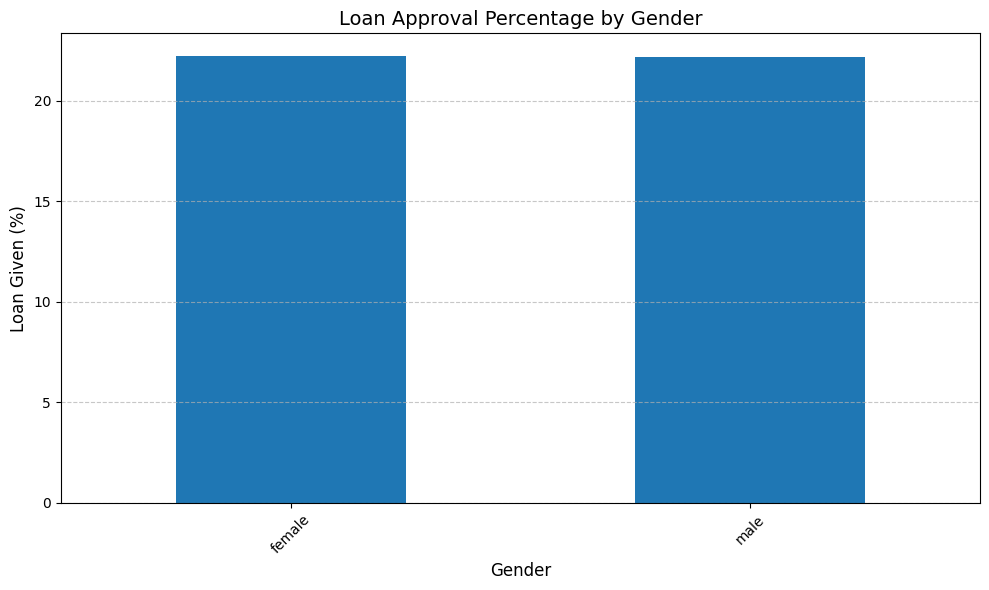

<ipython-input-14-808774f12597>:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = loan_data.groupby('age_group')['loan_status'].mean() * 100



Average Loan Approval Percentage by Age Group:
age_group
young    22.716042
adult    20.836738
old      24.739583
Name: loan_status, dtype: float64


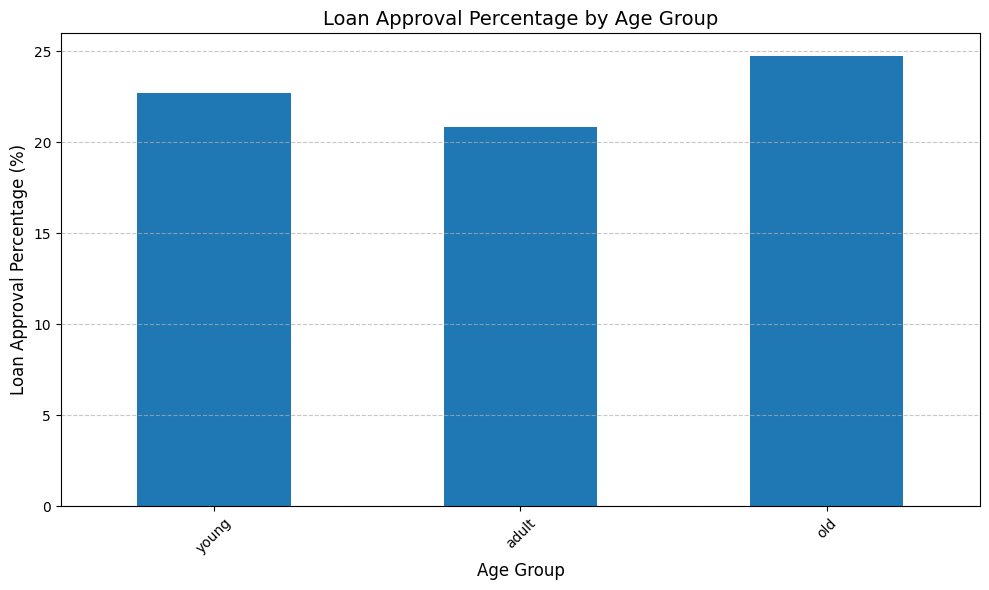


Average Loan Approval Percentage by Education Level:
person_education
Associate      22.031926
Bachelor       22.524069
Doctorate      22.866345
High School    22.310391
Master         21.762178
Name: loan_status, dtype: float64


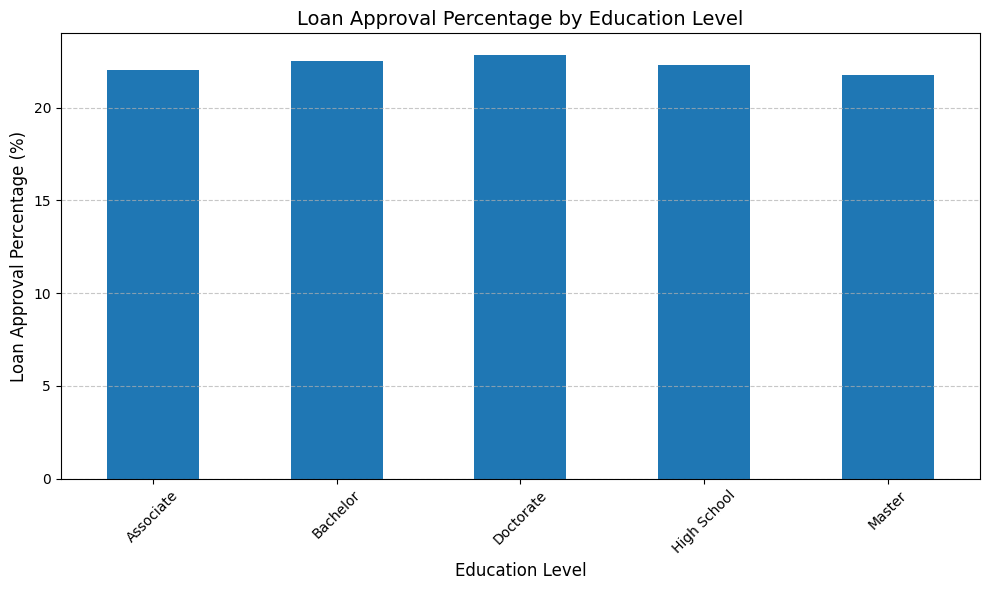


Average Loan Approval Percentage by Loan Intent:
loan_intent
DEBTCONSOLIDATION    30.272918
EDUCATION            16.956189
HOMEIMPROVEMENT      26.301484
MEDICAL              27.819373
PERSONAL             20.140360
VENTURE              14.426397
Name: loan_status, dtype: float64


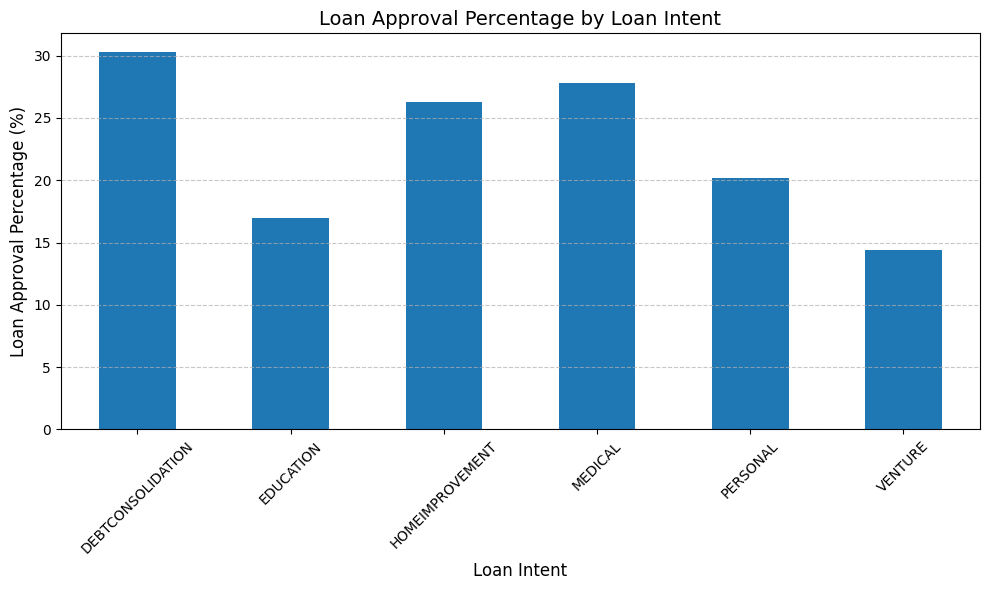


Average Loan Approval Percentage by Previous Loan Defaults on File:
previous_loan_defaults_on_file
No     45.163039
Yes     0.000000
Name: loan_status, dtype: float64


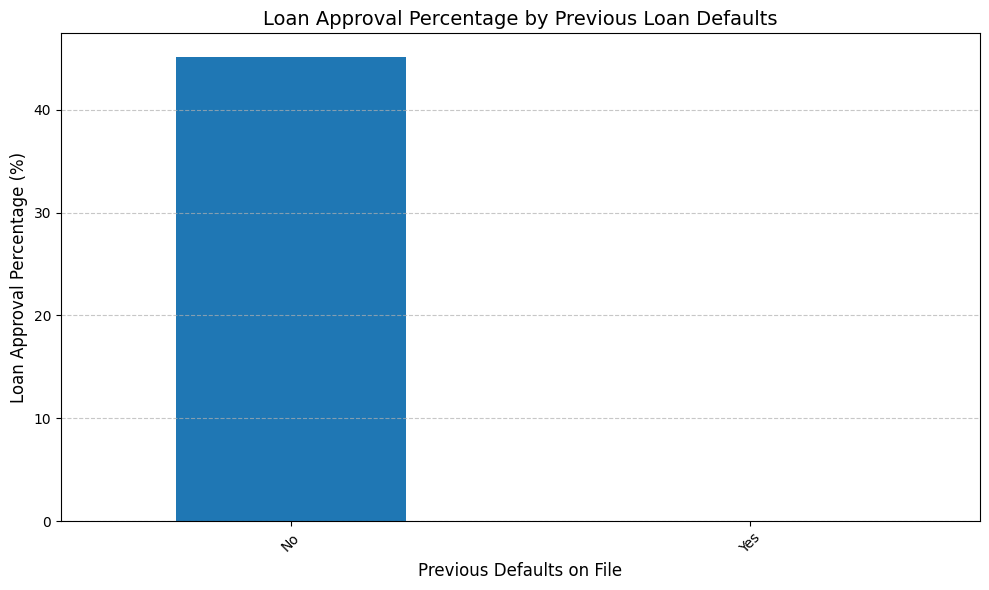

<ipython-input-14-808774f12597>:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_analysis = loan_data.groupby('loan_amnt_group')['loan_status'].mean() * 100



Average Loan Approval Percentage by Loan Amount Group:
loan_amnt_group
Below 20,000    21.300705
Above 20,000    35.160428
Name: loan_status, dtype: float64


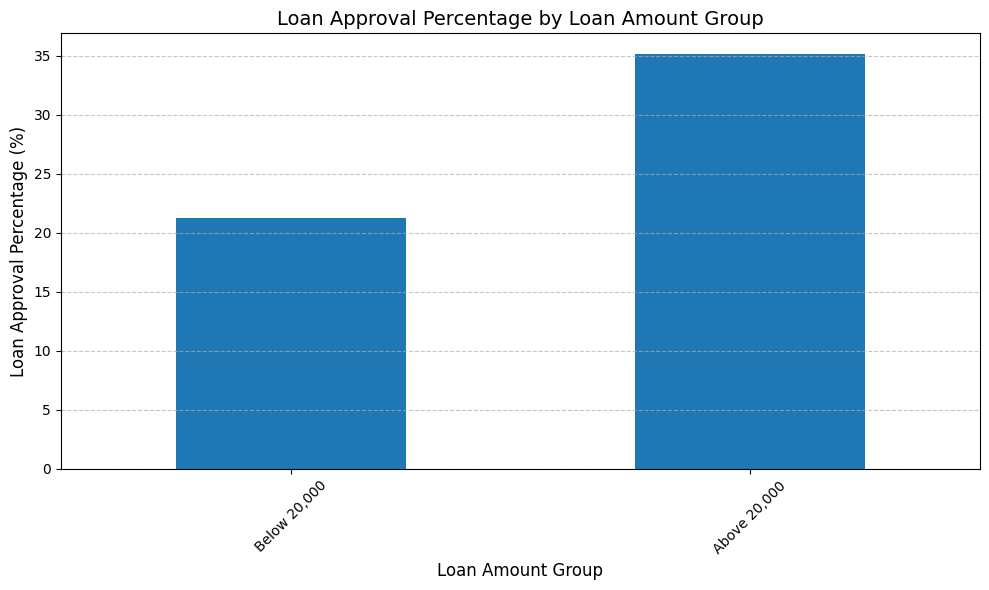

<ipython-input-14-808774f12597>:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_analysis = loan_data.groupby('income_group')['loan_status'].mean() * 100



Average Loan Approval Percentage by Income Group:
income_group
Low       37.955085
Medium    18.705823
High       9.437350
Name: loan_status, dtype: float64


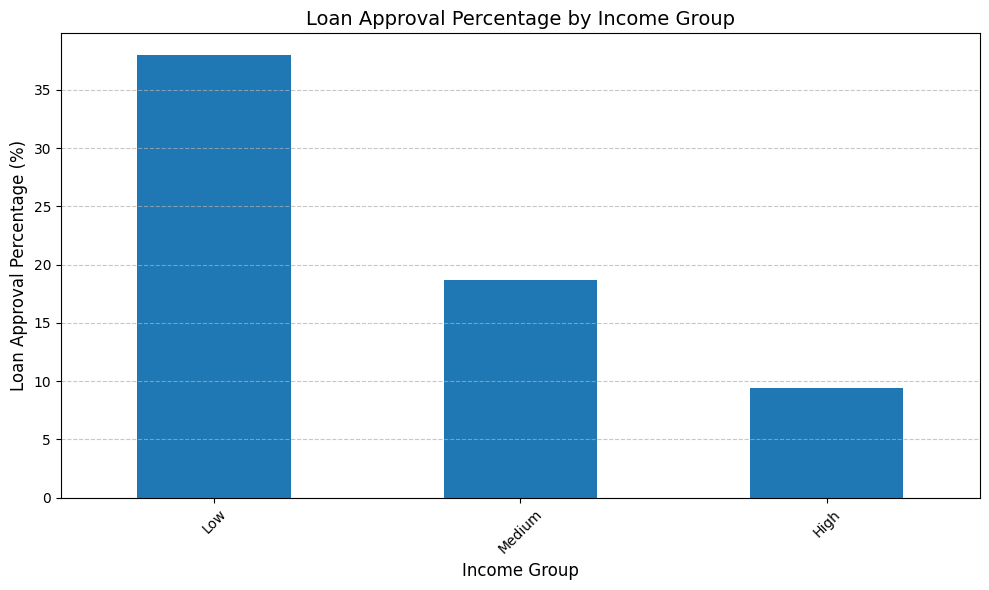

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/loan_data.csv'
loan_data = pd.read_csv(file_path)


columns_to_drop = ['person_emp_exp', 'loan_percent_income', 'cb_person_cred_hist_length']
loan_data = loan_data.drop(columns=columns_to_drop)


missing_values = loan_data.isnull().sum()
missing_values_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

print("Missing Values Summary:")
print(missing_summary)


# Summary statistics for numerical columns
numerical_summary = loan_data.describe()

# unique values
categorical_summary = loan_data.select_dtypes(include='object').nunique()

# Correlation matrix for numerical variables only
numerical_data = loan_data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

top_insights = {
    "Number of Rows": loan_data.shape[0],
    "Number of Columns": loan_data.shape[1],
    "Duplicate Rows": loan_data.duplicated().sum(),
}

print("\nTop Insights:")
for key, value in top_insights.items():
    print(f"{key}: {value}")

print("\nSummary Statistics for Numerical Data:")
print(numerical_summary)

print("\nUnique Values in Categorical Data:")
print(categorical_summary)

print("\nCorrelation Matrix:")
print(correlation_matrix)

def plot_bar(data, title, xlabel, ylabel):
    data.plot(kind='bar', figsize=(10, 6), legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze loan status distribution by gender
gender_analysis = loan_data.groupby('person_gender')['loan_status'].value_counts(normalize=True).unstack() * 100
gender_analysis.columns = ['Loan Not Given (%)', 'Loan Given (%)']
print("\nLoan Status Distribution by Gender:")
print(gender_analysis)

plot_bar(gender_analysis['Loan Given (%)'],
         "Loan Approval Percentage by Gender",
         "Gender",
         "Loan Given (%)")

loan_data['age_group'] = pd.cut(
    loan_data['person_age'],
    bins=[20, 30, 50, np.inf],
    labels=['young', 'adult', 'old'],
    right=False
)

# Analyze the average loan status by age group
age_group_analysis = loan_data.groupby('age_group')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Age Group:")
print(age_group_analysis)

plot_bar(age_group_analysis,
         "Loan Approval Percentage by Age Group",
         "Age Group",
         "Loan Approval Percentage (%)")

# Analyze the average loan status by education level
education_analysis = loan_data.groupby('person_education')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Education Level:")
print(education_analysis)

plot_bar(education_analysis,
         "Loan Approval Percentage by Education Level",
         "Education Level",
         "Loan Approval Percentage (%)")

# Analyze the average loan status by loan intent
loan_intent_analysis = loan_data.groupby('loan_intent')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Loan Intent:")
print(loan_intent_analysis)

plot_bar(loan_intent_analysis,
         "Loan Approval Percentage by Loan Intent",
         "Loan Intent",
         "Loan Approval Percentage (%)")

# Analyze the average loan status by previous loan defaults on file
previous_defaults_analysis = loan_data.groupby('previous_loan_defaults_on_file')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Previous Loan Defaults on File:")
print(previous_defaults_analysis)

plot_bar(previous_defaults_analysis,
         "Loan Approval Percentage by Previous Loan Defaults",
         "Previous Defaults on File",
         "Loan Approval Percentage (%)")

loan_data['loan_amnt_group'] = pd.cut(
    loan_data['loan_amnt'],
    bins=[0, 20000, np.inf],
    labels=['Below 20,000', 'Above 20,000']
)

# Analyze the average loan status by loan amount group
loan_amount_analysis = loan_data.groupby('loan_amnt_group')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Loan Amount Group:")
print(loan_amount_analysis)

plot_bar(loan_amount_analysis,
         "Loan Approval Percentage by Loan Amount Group",
         "Loan Amount Group",
         "Loan Approval Percentage (%)")

loan_data['income_group'] = pd.cut(
    loan_data['person_income'],
    bins=[0, 50000, 100000, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Analyze the average loan status by income group
income_group_analysis = loan_data.groupby('income_group')['loan_status'].mean() * 100
print("\nAverage Loan Approval Percentage by Income Group:")
print(income_group_analysis)

plot_bar(income_group_analysis,
         "Loan Approval Percentage by Income Group",
         "Income Group",
         "Loan Approval Percentage (%)")
